In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('saled.csv',encoding='latin1',parse_dates=["Order Date"])

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,6/13/2013,6/17/2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,10/11/2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,10/11/2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.shape

In [ ]:
df.info()

In [4]:
df.Sales

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64

In [8]:
# Remove columns which are not required in predictions

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
df.drop(cols, axis = 1, inplace = True)
df.head()

,Order Date,Sales
0,2013-11-09,261.9600
1,2013-11-09,731.9400
2,2013-06-13,14.6200
3,2012-10-11,957.5775
4,2012-10-11,22.3680


In [9]:
# Sort the Order Date 
df = df.sort_values('Order Date')

#print the sorted values
print(df.head(1))

#check any missing values
df.isnull().sum()

     Order Date   Sales
7980 2011-01-04  16.448


Order Date    0
Sales         0
dtype: int64

In [10]:
# grouping sales according to Order Date
df.groupby('Order Date')['Sales'].sum().reset_index()

# min and max values of Order Date
print(df['Order Date'].min())
print(df['Order Date'].max())

2011-01-04 00:00:00
2014-12-31 00:00:00


In [11]:
#set 'Order Date' as index
df = df.set_index('Order Date')
df.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-05', '2011-01-05',
               '2011-01-06', '2011-01-07', '2011-01-07', '2011-01-07',
               '2011-01-07', '2011-01-07',
               ...
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31', '2014-12-31', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [12]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = df['Sales'].resample('MS').mean()
y['2013':]

Order Date
2013-01-01    208.342596
2013-02-01    278.874524
2013-03-01    317.926814
2013-04-01    230.874076
2013-05-01    255.365212
2013-06-01    195.200213
2013-07-01    193.169623
2013-08-01    184.808691
2013-09-01    201.403616
2013-10-01    297.174368
2013-11-01    220.354753
2013-12-01    277.821191
2014-01-01    275.945321
2014-02-01    193.176318
2014-03-01    237.484414
2014-04-01    202.587984
2014-05-01    175.581678
2014-06-01    206.238242
2014-07-01    214.284801
2014-08-01    282.183881
2014-09-01    195.440004
2014-10-01    257.595216
2014-11-01    251.289644
2014-12-01    189.674216
Freq: MS, Name: Sales, dtype: float64

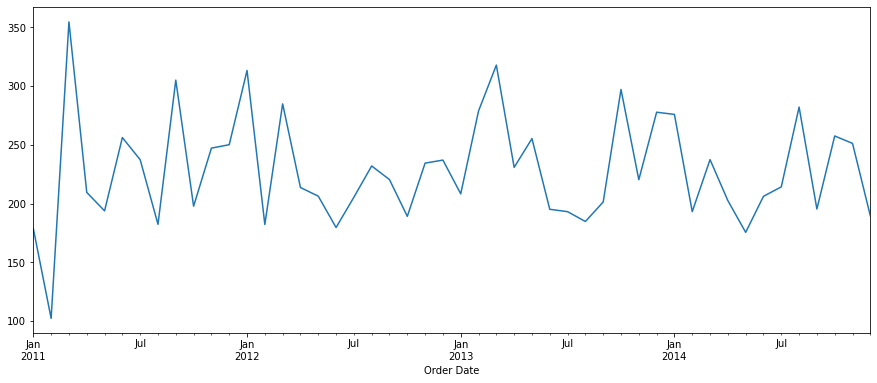

In [13]:

y.plot(figsize = (15, 6))
plt.show()

In [14]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [15]:
test_result=adfuller(df['Sales'])

In [16]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [17]:
adfuller_test(df['Sales'])

ADF Test Statistic : -98.26796344737438
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 9993
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [18]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [19]:
df['Sales'].shift(1)

Order Date
2011-01-04        NaN
2011-01-05     16.448
2011-01-05     11.784
2011-01-05    272.736
2011-01-06      3.540
               ...   
2014-12-31    209.300
2014-12-31      3.024
2014-12-31     52.776
2014-12-31     90.930
2014-12-31     13.904
Name: Sales, Length: 9994, dtype: float64

In [20]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)


In [21]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Order Date,,,
2011-01-04,16.448,NaN,NaN
2011-01-05,11.784,-4.664,NaN
2011-01-05,272.736,260.952,NaN
2011-01-05,3.540,-269.196,NaN
2011-01-06,19.536,15.996,NaN
2011-01-07,5.480,-14.056,NaN
2011-01-07,2573.820,2568.340,NaN
2011-01-07,609.980,-1963.840,NaN
2011-01-07,12.780,-597.200,NaN


In [22]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -27.981462381330875
p-value : 0.0
#Lags Used : 35
Number of Observations Used : 9946
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


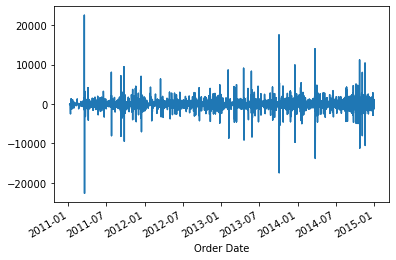

In [23]:
df['Seasonal First Difference'].plot()

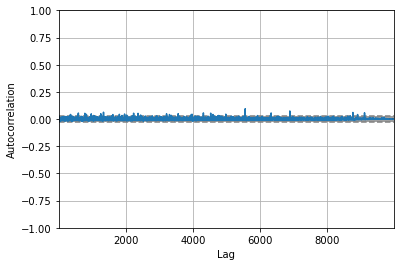

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [43]:
import itertools
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


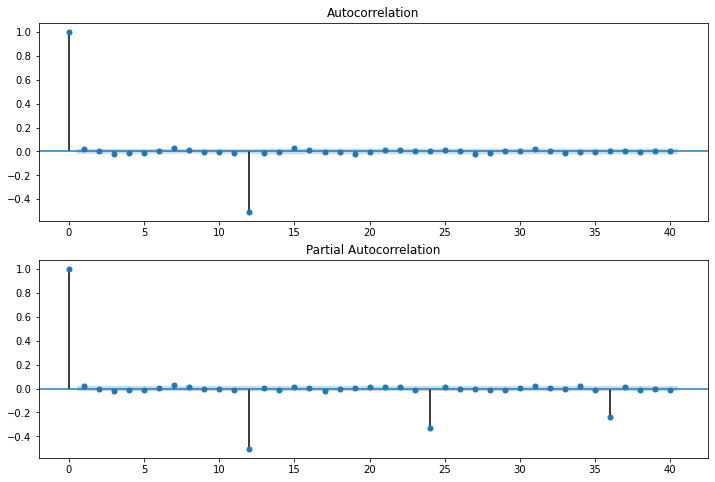

In [29]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

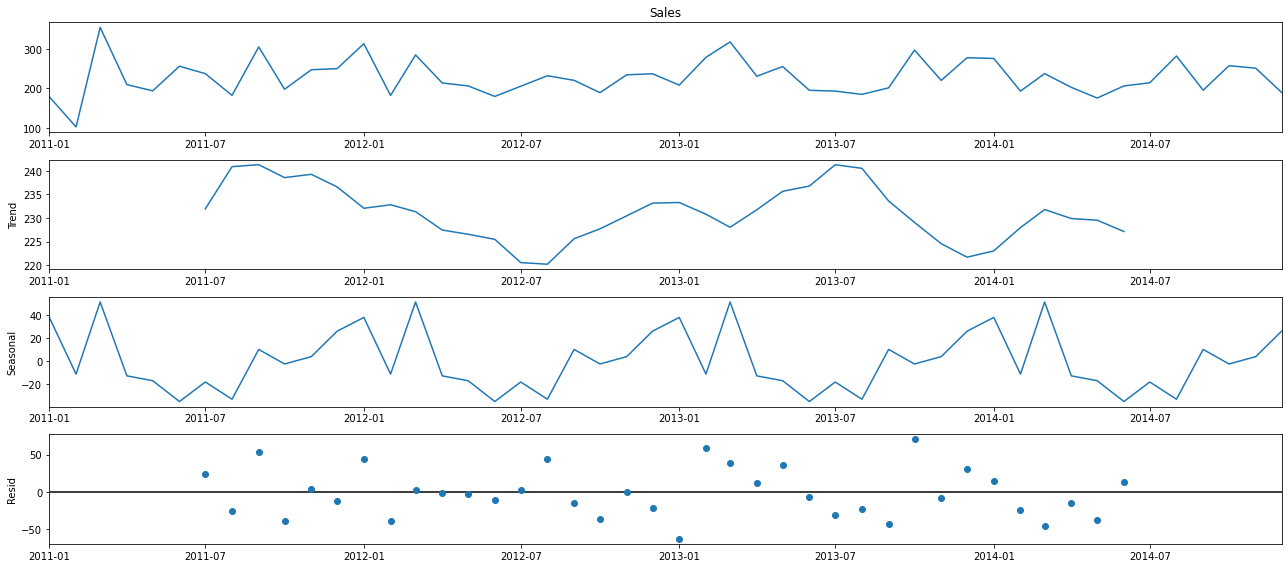

In [42]:

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [32]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                 9993
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -78486.552
Method:                       css-mle   S.D. of innovations            623.147
Date:                Thu, 27 Aug 2020   AIC                         156981.103
Time:                        17:56:31   BIC                         157009.942
Sample:                             1   HQIC                        156990.865
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0020      0.002     -0.896      0.371      -0.006       0.002
ar.L1.D.Sales     0.0169      0.010      1.692      0.091      -0.003       0.037
ma.L1.D.Sales    -0.9999      0.000  -3678.493      0.000      -1.000      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           59.0720           +0.0000j           59.0720            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [34]:
import statsmodels.api as sm

In [35]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [44]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:661.4886157174649


C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2128.3582285436296
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:399.89893654606163
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:394.880518720398
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:565.9003451648684
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:561.4306762201827
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:393.8920932376485
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:395.8716969428535
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:624.3405765942384


C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2067.3333868603113
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:401.8957405821274
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:396.480509030347
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:563.1242996302301


C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:566.2254579661412
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:395.565374152792
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:397.43750376644715
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:536.4236089671035


C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2032.6210837762978
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:410.26238493175936
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:409.16854252673505
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:536.2680856312761


C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1985.165732168309
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:408.5706939861617
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:410.2913086368828
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:502.73544247852715


C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1822.0099456099479
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:395.4504354478704
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:391.3336179895837
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:504.3555294439778
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:390.28793261135223
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:392.2872548201009
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:550.6652828900441


C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2365.435088908316
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:401.89660236902563
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:396.53075213079444
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:549.1026845894837
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:550.252187461562
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:395.5670363307237
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:397.45103904029685


C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:518.4257708750417


C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2172.9484146970112
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:403.40075293408563
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:395.3064233082932


C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:520.1270695522903
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:522.2523837943576
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:394.41555998966754
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:396.2756181423579
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:517.5126959139176


C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1890.7852643594151
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:405.370811118704
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:400.4536482140896
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:519.5099924762985
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:397.657919731887
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:399.23476878764296
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:503.48006704254976


C:\Users\acer\Anaconda\envs\ram\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2030.8053310446064
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:397.39822356521927
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:393.196205743826
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:505.3421239156194
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:392.1441578937884
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:394.11939174307895


In [45]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0705      0.283     -0.249      0.803      -0.624       0.483
ma.L1         -0.9964      4.599     -0.217      0.828     -10.010       8.018
ar.S.L12      -0.5453      0.158     -3.449      0.001      -0.855      -0.235
sigma2      2694.9780   1.22e+04      0.220      0.826   -2.13e+04    2.67e+04


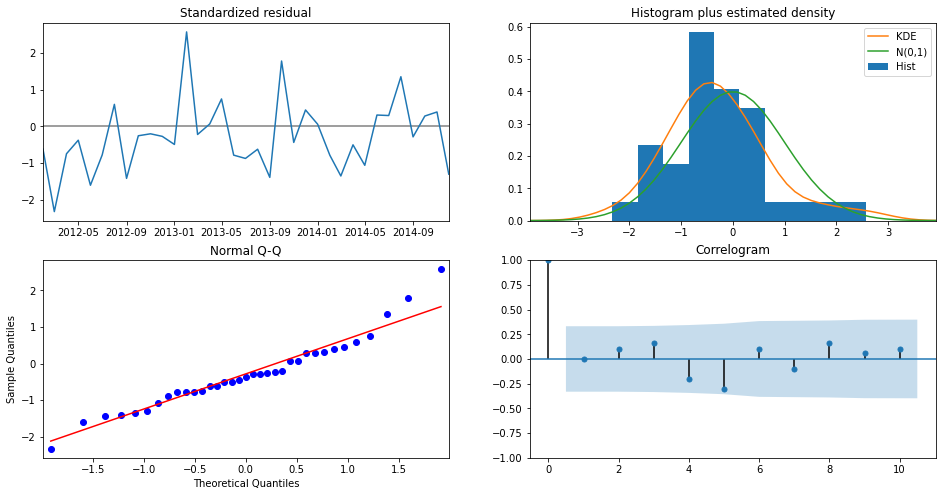

In [46]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()


In [47]:

prediction = result.get_prediction(start = pd.to_datetime('2013-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Sales,upper Sales
Order Date,,
2013-01-01,122.793046,351.558511
2013-02-01,18.282411,243.304243
2013-03-01,219.845384,440.978090
2013-04-01,117.968285,336.386856
2013-05-01,105.814854,322.231303
2013-06-01,130.843840,345.722346
2013-07-01,134.081336,347.741365
2013-08-01,112.343130,325.013953
2013-09-01,170.760276,382.612013


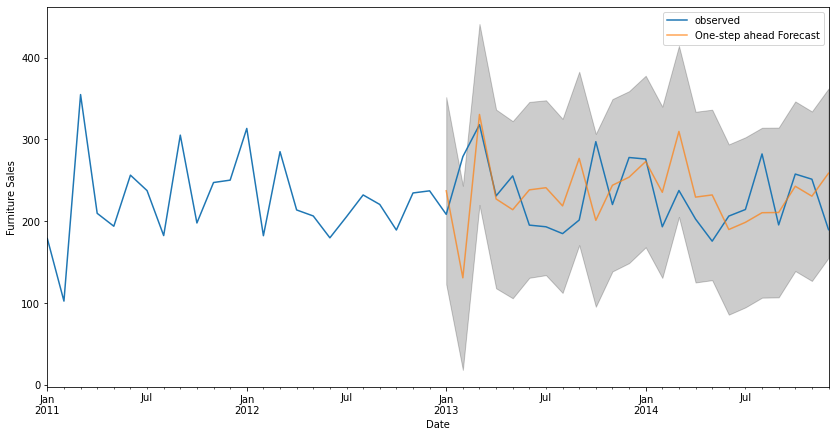

In [48]:
#Visualize the forecasting
ax = y['2011':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [49]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2013-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 2840.72
The Root Mean Squared Error of our forecasts is 53.3


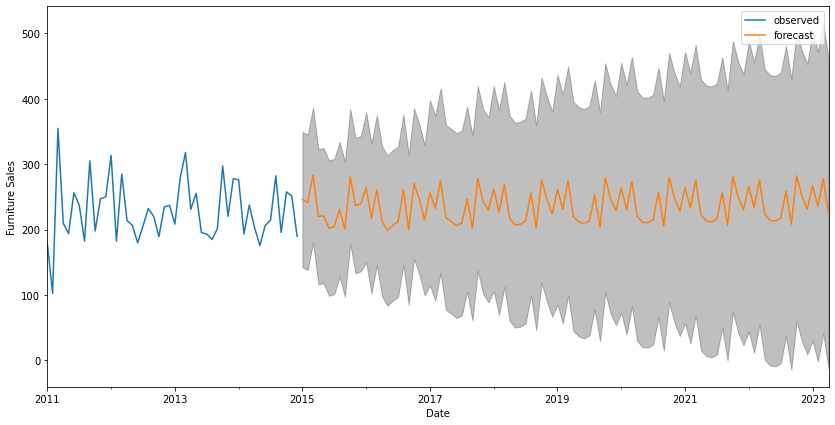

In [50]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()